# 3장 평가

- 머신러닝은 데이터가공/변환, 모델 학습/ 예측, 그리고 평가의 프로세스로 구성

- 타이타닉 생존자 예제에서 모델 예측 성능을 평가하기 위해 정확돌르 이용

- 성능 평가 지표는 일반적으로 모델이 회귀, 분류 모델에 따라 여러종류로 나눠짐

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

titanic_df = pd.read_csv("C:/py_data/titanic.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
y_titanic_df = titanic_df['Survived'] 
# Survived 열을 선택하여 y_titanic_df라는 변수에 저장합니다. 이 변수는 모델의 타겟 변수로 사용됩니다. 
# 즉, 승객이 생존했는지 여부(0 또는 1)를 나타냅니다.
X_titanic_df = titanic_df.drop('Survived', axis = 1)

In [5]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [6]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator): # 학습을 수행하는 fit()메서드는 아무것도 수행하지 않으며 예측을 수행하는 predict()메서드는 
# 단순히 sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 것 

    def fit(self, X, y=None):
            pass
        # 단순히 sex featurerk 1이면 0, 그렇지 않으면 1로 예측 
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]) :
            if X['Sex'].iloc[i] ==1:
                pred[i] = 0
            else :
                pred[i] = 1
        return pred


In [7]:
from sklearn.preprocessing import LabelEncoder


def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features=['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

In [8]:
X_titanic_df = transform_features(X_titanic_df)

C:\Users\705-8\AppData\Local\Temp\ipykernel_10284\1540999058.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
C:\Users\705-8\AppData\Local\Temp\ipykernel_10284\1540999058.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [9]:
X_titanic_df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=0)

In [11]:
my_clf = MyDummyClassifier()
my_clf.fit(X_train, y_train)

mypredictions = my_clf.predict(X_test)
print('Dummy Classifier의 정확도는 :{0:4f}'.format(accuracy_score(y_test ,
                                                             mypredictions)))

Dummy Classifier의 정확도는 :0.787709


In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

class MyFakeClassfier(BaseEstimator):
    def fit(self,X,y):
        pass

# 입력값으로 들어오는 x데이터 셋의 크기만큼 모두 0 값으로 만들어서 반환
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)



In [23]:
digits = load_digits() # 사이킷런의 내장 데이터 셋인 로드 디지트를 이용해서 mnist 데이터 로딩

In [25]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [27]:
digits['target'][:30]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
(digits['target'] == 7)[:10]

array([False, False, False, False, False, False, False,  True, False,
       False])

In [31]:
y = (digits['target'] == 7).astype(int)
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(digits['data'],y,
                                                 random_state=11)

In [35]:
# 불균형한 레이블 데이터 분포도 확인 
print('레이블 데이터 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 데이터 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64


In [37]:
fakeclf = MyFakeClassfier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('\n 모든 예측을 0으로 하여도 정확도는 :{:.3f}'.format(accuracy_score(y_test,
                                                            fakepred)))


 모든 예측을 0으로 하여도 정확도는 :0.900


In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_testdml confusion matrix 출력
# 입력 변수로는 (실제값, 예측값) 순으로 입력

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test , pred): # 여기는 우리가 만든거
    confusion = confusion_matrix(y_test , pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print ('오차 행렬')
    print(confusion)
    print('정확도 : {0: 4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy,
          precision, recall))
                            

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('c:/py_data/titanic.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 :  0.865922, 정밀도 : 0.8246, 재현율 : 0.7705


C:\Users\705-8\AppData\Local\Temp\ipykernel_10284\1540999058.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
C:\Users\705-8\AppData\Local\Temp\ipykernel_10284\1540999058.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

## 정밀도와 재현율 트레이드 오프

In [46]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'. format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 : \n'. pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis =1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba.result[:3])


pred_proba()결과 Shape : (179, 2)


AttributeError: 'str' object has no attribute 'pred_proba'

In [ ]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

In [ ]:
custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)


In [ ]:
custom_threshold = 0.6

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)


In [ ]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer =  Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임곗값:', custom_threshold)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

In [51]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:',thresholds.shape)


thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10 개:', thr_index)
print('샘플용 10 개의 임곗값:', np.round(thresholds[thr_index],2))

print('샘플 임곗값별 정밀도:', np.round(precision[thr_index],3))
print('샘플 임곗값별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 shape: (165,)
샘플 추출을 위한 임곗값 배열의 index 10 개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10 개의 임곗값: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]


NameError: name 'precision' is not defined

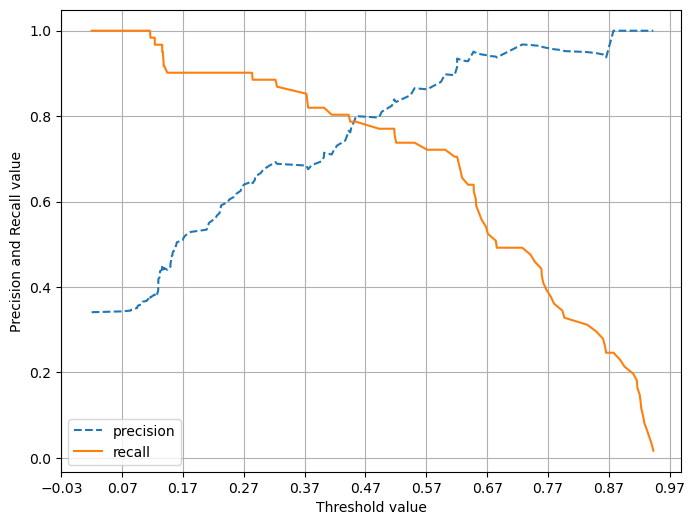

In [53]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label = 'recall')


    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

# F1 스코어

In [56]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test , pred)
print('F1 스코어: {0: 4f}'.format(f1))

F1 스코어:  0.796610


In [58]:
def get_clf_eval(y_test , pred): # 여기는 우리가 만든거
    confusion = confusion_matrix(y_test , pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)

    f1 = f1_score(y_test , pred)
    print ('오차 행렬')
    print(confusion)
    print('정확도 : {0: 4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.\
          format(accuracy,precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

pred_proba = lr_clf.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

NameError: name 'get_eval_by_threshold' is not defined

# 5 ROC 곡선과 AUC
- ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능에서 중요하게 사용되는 지표
- ROC 곡선은 FPR이 변할때 TPR이 어떻게 변하는지를 나타내는 곡선

In [63]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환도니 입곗갑 배열 로우가 48건이므로 샘플로 10만건만 추출하되, 임계값을 5step으로 추출

thr_index = np.arange(1,thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗갑 배열의 index 10개:' , thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index],2))

print('샘플 임곗값별 FPR:' , np.round(fprs[thr_index], 3 ))
print('샘플 임곗값별 TPR:' , np.round(tprs[thr_index], 3 ))

샘플 추출을 위한 임곗갑 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46]
샘플용 10개의 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


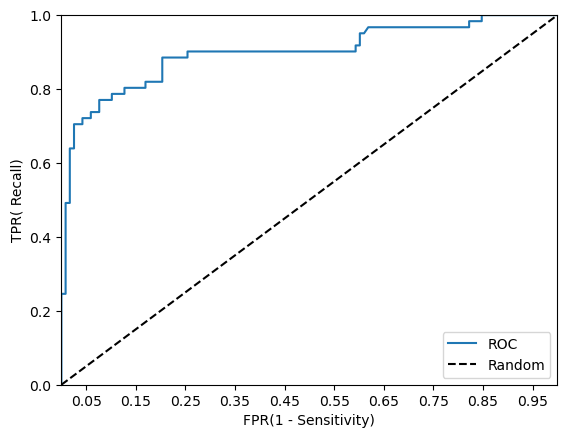

In [91]:
def roc_curve_plot(y_test, pred_proba_c1):

    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1) # 이걸 실행시키면 값이 3개 나오는거 threshold는 총 48개

    plt.plot(fprs, tprs, label = 'ROC') # 곡선 그림을 그린다

    plt.plot([0,1], [0,1], 'k--', label='Random')

    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end, 0.1),2)) #x축의 눈금 위치와 레이블을 설정하는 데 사용 
    # 여기서는 2로 반올림하고 있으므로, 소수점 이하 2자리까지의 값을 가지게 됩니다.
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR( Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])


In [73]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC 값: {np.round(roc_score,3)}')

ROC AUC 값: 0.899


In [81]:
def get_clf_eval(y_test , pred = None, pred_proba = None): # 여기는 우리가 만든거
    confusion = confusion_matrix(y_test , pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred_proba)

    print ('오차 행렬')
    print(confusion)
    print('정확도 : {0: 4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.\
          F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision, recall, f1,roc_auc))

SyntaxError: invalid decimal literal (2835829809.py, line 13)

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# 정규분포를 따른다고 가정하고 만든게 로지스틱회귀, 그래서 standard저걸로 표준화를 시켜준다

diabetes_data = pd.read_csv('c:/py_data/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)


Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [89]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [130]:
def get_clf_eval(y_test , pred = None): # 여기는 우리가 만든거
    confusion = confusion_matrix(y_test , pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred)
    print ('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도 : {0: .4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f},\
          F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision, recall, f1, roc_auc))

In [162]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label = 'recall')


    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()


In [164]:
X= diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , pred)

오차 행렬
[[87 13]
 [22 32]]
정확도 :  0.7727, 정밀도 : 0.7111, 재현율 : 0.5926,          F1:0.6465, AUC:0.7313


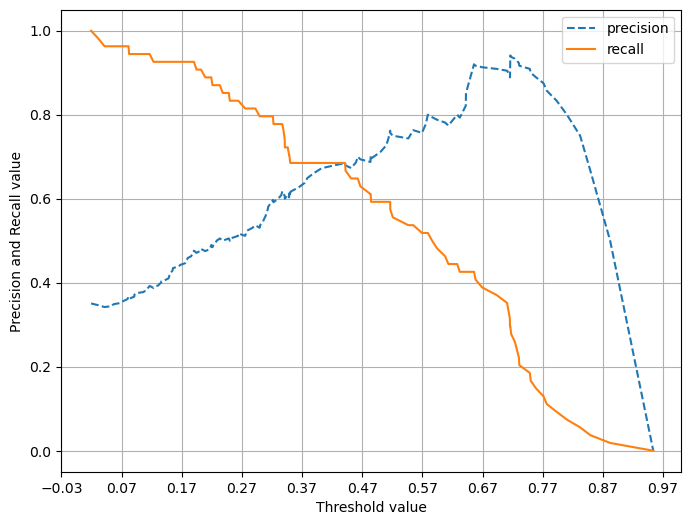

In [166]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [168]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


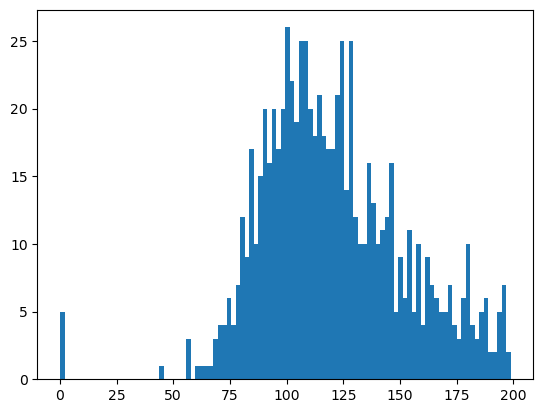

In [170]:
plt.hist(diabetes_data['Glucose'], bins = 100)
plt.show()

In [176]:
# 0값을 검사할 피처명 리스트 객체 설정

zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count,
                                                 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [180]:
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0,diabetes_data[zero_features].mean())

In [190]:
X= diabetes_data.iloc[:, :-1] # 전체행 콜론부터 -1 까지의 열을 얘기하는 것이다 마지막이 당뇨병의 유무를 제외하고 모든 열을 넣는다
y = diabetes_data.iloc[:, -1]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[90 10]
 [21 33]]
정확도 :  0.7987, 정밀도 : 0.7674, 재현율 : 0.6111,          F1:0.6804, AUC:0.7556


In [194]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer =  Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [204]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test , pred_proba[:,1].reshape(-1,1),thresholds)


임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도 :  0.7143, 정밀도 : 0.5658, 재현율 : 0.7963,          F1:0.6615, AUC:0.7331

임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도 :  0.7403, 정밀도 : 0.6000, 재현율 : 0.7778,          F1:0.6774, AUC:0.7489

임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도 :  0.7468, 정밀도 : 0.6190, 재현율 : 0.7222,          F1:0.6667, AUC:0.7411

임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도 :  0.7532, 정밀도 : 0.6333, 재현율 : 0.7037,          F1:0.6667, AUC:0.7419

임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도 :  0.7792, 정밀도 : 0.6923, 재현율 : 0.6667,          F1:0.6792, AUC:0.7533

임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도 :  0.7857, 정밀도 : 0.7059, 재현율 : 0.6667,          F1:0.6857, AUC:0.7583

임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도 :  0.7987, 정밀도 : 0.7447, 재현율 : 0.6481,          F1:0.6931, AUC:0.7641

임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도 :  0.7987, 정밀도 : 0.7674, 재현율 : 0.6111,          F1:0.6804, AUC:0.7556
